In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from pyreadr import read_r
import numpy as np

# Load the data
ling_data = pd.read_csv('../data/lingData.txt', sep='\\s+')
ling_location = pd.read_csv('../data/lingLocation.txt', sep='\\s+')

# ling_data has a column for each question, and ling_location has a column
# for each question x answer.  Sorry the columns in ling_location are not usefully named,
# but it's not too tricky to figure out which is which.
# Note that you still need to clean this data (check for NA's, missing location data, etc.)

# Load the question_data which contains quest.mat, quest.use, ans.---
question_data = read_r('../data/question_data.RData')

RecursionError: maximum recursion depth exceeded while calling a Python object

In [ ]:
# Inspect column names
print(ling_data.columns)
print(ling_location.columns)

# Load state geometries
state_df = gpd.read_file('../data/shapefiles')
state_df = state_df[state_df['iso_a2'] == 'US']  # Filter to only US

Index(['ID', 'CITY', 'STATE', 'ZIP', 'Q050', 'Q051', 'Q052', 'Q053', 'Q054',
       'Q055', 'Q056', 'Q057', 'Q058', 'Q059', 'Q060', 'Q061', 'Q062', 'Q063',
       'Q064', 'Q065', 'Q066', 'Q067', 'Q068', 'Q069', 'Q070', 'Q071', 'Q072',
       'Q073', 'Q074', 'Q075', 'Q076', 'Q077', 'Q078', 'Q079', 'Q080', 'Q081',
       'Q082', 'Q083', 'Q084', 'Q085', 'Q086', 'Q087', 'Q088', 'Q089', 'Q090',
       'Q091', 'Q092', 'Q093', 'Q094', 'Q095', 'Q096', 'Q097', 'Q098', 'Q099',
       'Q100', 'Q101', 'Q102', 'Q103', 'Q104', 'Q105', 'Q106', 'Q107', 'Q109',
       'Q110', 'Q111', 'Q115', 'Q117', 'Q118', 'Q119', 'Q120', 'Q121', 'lat',
       'long'],
      dtype='object')
Index(['Number of people in cell', 'Latitude', 'Longitude', 'V4', 'V5', 'V6',
       'V7', 'V8', 'V9', 'V10',
       ...
       'V462', 'V463', 'V464', 'V465', 'V466', 'V467', 'V468', 'V469', 'V470',
       'V471'],
      dtype='object', length=471)


/var/folders/c9/rd_bbydj4t38q93kh_8bg7f00000gn/T/ipykernel_58484/3339115619.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plural_second_person['Q050'] = plural_second_person['Q050'].astype(str)


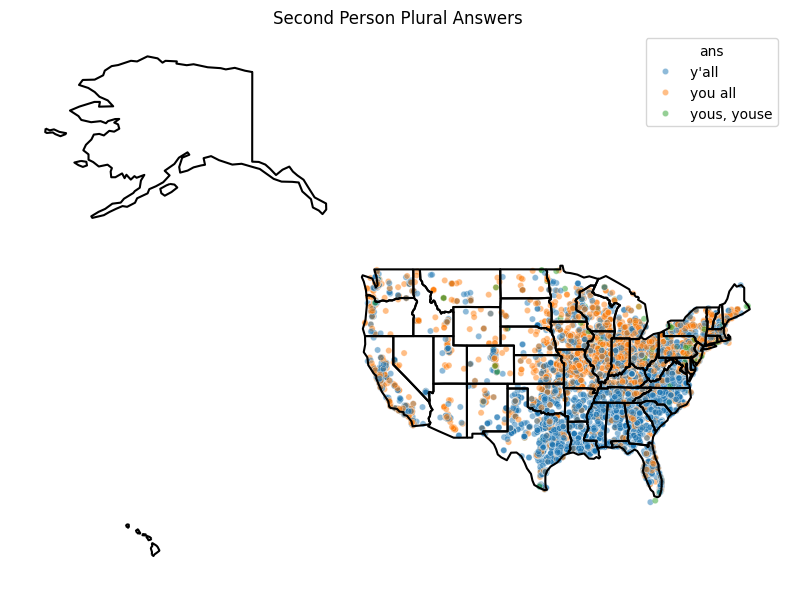

In [ ]:
# Define the map theme
def my_map_theme():
    plt.axis('off')
# Note: the below plots are *ugly*. You can make nicer plots!

############
# Plot for the second person plural answers
plural_second_person = ling_data[(ling_data['Q050'].isin([1, 2, 9])) & (ling_data['long'] > -125)]
answers_q50 = question_data['ans.50']

# Prepare to join
answers_q50['Q050'] = (answers_q50.index + 1).astype(str)
plural_second_person['Q050'] = plural_second_person['Q050'].astype(str)
plural_second_person = plural_second_person.merge(answers_q50, on='Q050', how='inner')
# remove unused categories
plural_second_person['ans'] = plural_second_person['ans'].cat.remove_unused_categories()

# Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=plural_second_person, x='long', y='lat', hue='ans', s=20, alpha=0.5)
state_gdf = gpd.GeoDataFrame(state_df)
state_gdf.boundary.plot(ax=plt.gca(), color='black')
my_map_theme()
plt.title("Second Person Plural Answers")
plt.show()

/Users/lloydconnelly/miniconda3/envs/215a/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


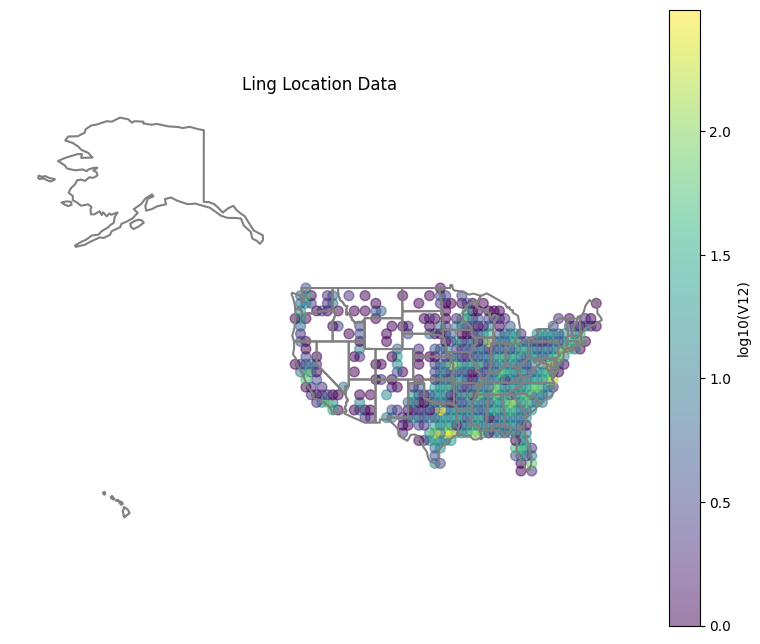

In [ ]:

###############
# Plot the ling_location data
ling_location_filtered = ling_location[ling_location['Longitude'] > -125]

plt.figure(figsize=(10, 8))
plt.scatter(ling_location_filtered['Longitude'],
            ling_location_filtered['Latitude'],
            c=np.log10(ling_location_filtered['V12']),
            cmap='viridis', s=50, alpha=0.5)
state_gdf.boundary.plot(ax=plt.gca(), color='gray')
my_map_theme()
plt.colorbar(label='log10(V12)')
plt.title("Ling Location Data")
plt.show()

# Note: For county-level plots, you would typically need a shapefile for counties and join the data accordingly.